In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn as sks
import seaborn as sns

In [2]:
df1=pd.read_csv(r"C:\Users\KIIT\Desktop\py_u\real_estate_price_prediction\Dataset\Bengaluru_House_Data.csv")

In [3]:
df1.shape

(13320, 9)

In [4]:
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
df1.groupby("area_type")['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df1.groupby("size")['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [7]:
df1.groupby('bath')['bath'].agg('count')

bath
1.0      788
2.0     6908
3.0     3286
4.0     1226
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
11.0       3
12.0       7
13.0       3
14.0       1
15.0       1
16.0       2
18.0       1
27.0       1
40.0       1
Name: bath, dtype: int64

In [8]:
df1.groupby("size")['size'].agg("count")

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [9]:
df1.groupby("balcony")['balcony'].agg('count')

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [10]:
#area_type ,availability and society are not thtt much important variable for predicting a house price
#so we will drop these attributes form the dataset

In [11]:
df2=df1.drop(['area_type','availability','society',],axis=1)

In [12]:
df2

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [13]:
#data Cleaning :- start with NaN values

In [14]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [15]:
med=df1['balcony'].median()
med

2.0

In [16]:
df2['balcony'].fillna(med, inplace=True)

In [17]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [18]:
df2['bath'].fillna(int(df1['bath'].median()),inplace=True)

In [19]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [20]:
#out of 13.5k diffrent we can drop 16 values whose size is null

In [21]:
df3=df2.dropna()

In [22]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [23]:
df3.shape

(13303, 6)

In [24]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [25]:
#in size column some values are in bhk and some is in bedroom
#we will remove the bhk part and take only the integral part of data

In [26]:
df3['size_in_bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-26-7721c5934b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['size_in_bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [27]:
df3

,location,size,total_sqft,bath,balcony,price,size_in_bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,2.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [28]:
df3['size_in_bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [29]:
df3=df3.drop(['size'],axis=1)

In [30]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [31]:
#here we can see some values are also is a range

In [32]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [33]:
#those values whose house size in sq feet is not a valid float digit and having in interval or some textual values

In [34]:
df3[~df3['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,balcony,price,size_in_bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,1520 - 1740,2.0,2.0,74.820,3
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


In [35]:
#here some values are also in text

In [36]:
#any time we having a range we simply take average of them and when we get any texual data we simply remove column

In [37]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [38]:
convert_sqft_to_num('3090 - 5002')

4046.0

In [39]:
convert_sqft_to_num('2400')

2400.0

In [40]:
convert_sqft_to_num('34.46Sq. Meter')

In [41]:
df4=df3.copy()

In [42]:
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [43]:
df4.head(3)

,location,total_sqft,bath,balcony,price,size_in_bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3


In [44]:
df4.loc[669]

location       JP Nagar
total_sqft         5520
bath                  2
balcony               2
price               375
size_in_bhk           5
Name: 669, dtype: object

In [45]:
df4.loc[410]

location       Kengeri
total_sqft         NaN
bath                 1
balcony              0
price             18.5
size_in_bhk          1
Name: 410, dtype: object

In [46]:
df4.shape

(13303, 6)

In [47]:
df4.isnull().sum()

location        0
total_sqft     46
bath            0
balcony         0
price           0
size_in_bhk     0
dtype: int64

In [48]:
df4.dropna()

,location,total_sqft,bath,balcony,price,size_in_bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Richards Town,3600.0,5.0,2.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [49]:
#feature engineering and outlier detection

In [50]:
df5=df4.copy()

In [51]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

##### df

In [52]:
df5

,location,total_sqft,bath,balcony,price,size_in_bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [53]:
len(df5["location"].unique())
#threre are 1303 unique values of location
#since we cant do out opertation 

1304

In [54]:
#to handle with text data we split it into dummy columns but if we keep all the columns we have to make 13034 colums
# and creates diamensionality curese
#one effective way to solve this prolem is if any loaction have less than 11 houses just put it in other category.

In [55]:
df5.loaction=df5.location.apply(lambda x: x.strip())
#strip function is used to remove leading and tailing charecter form the string as the arument passed
#here we are removing if there is any space value

<ipython-input-55-b2c40d6b8c16>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df5.loaction=df5.location.apply(lambda x: x.strip())


In [56]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                            539
Sarjapur  Road                        397
Electronic City                       302
Kanakpura Road                        273
Thanisandra                           234
                                     ... 
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
 Anekal                                 1
Name: location, Length: 1304, dtype: int64

In [57]:
len(location_stats[location_stats<=10])

1063

In [58]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Ganga Nagar                           10
Nagappa Reddy Layout                  10
BTM 1st Stage                         10
Dodsworth Layout                      10
Kalkere                               10
                                      ..
Konappana Agrahara                     1
Kodanda Reddy Layout                   1
Kirloskar layout, Basaveshwarnagar     1
Kengeri Satellite Town Stage II        1
 Anekal                                1
Name: location, Length: 1063, dtype: int64

In [59]:
#out of 1304 loc 1063 locations have 10 or less no of houses make them fall in a category of others

In [60]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [61]:
df5

,location,total_sqft,bath,balcony,price,size_in_bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,other,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [62]:
#outliers detection and removal (removing the extreme variations in the data set)

In [63]:
#1st anamoly(size of each room is atleast 200sqft)

In [64]:
#suppose our size per room is 200 sqft.
#suppose any data in our data set having 3BHK and total area is 300 sq feet so that is an anomaly so we have to
   #remove those data points

In [65]:
df5[(df5.total_sqft/df5.size_in_bhk)<300].shape

(744, 7)

In [66]:
#creating a new data which do not have this anamoly

In [67]:
df6=df5[~((df5.total_sqft/df5.size_in_bhk)<300)]

In [68]:
df6.shape

(12559, 7)

In [69]:
df5.shape

(13303, 7)

In [70]:
13303-12963

340

In [71]:
#2nd anamoly(checking for price_per_sqft)

In [72]:
df6.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [73]:
#minimum price per sqft in blr cant be 267rs
#and max cant be 176470 so we have to remove these points as outliers

In [74]:
#since we assume our data is normally distributed so we keep only those price per sqft which is in the range
# mean+-1std dev

In [75]:
len(df6["location"].unique())


242

In [76]:
def remove_outliers(df):
    
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        red_df=subdf[(subdf.price_per_sqft>(m-sd))&(subdf.price_per_sqft<=(m+sd))]
        df_out=pd.concat([df_out,red_df],ignore_index=True)

    return df_out

In [77]:
df7=remove_outliers(df6)

In [78]:
df7

,location,total_sqft,bath,balcony,price,size_in_bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,3.0,44.00,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...,...
10284,other,1353.0,2.0,2.0,110.00,2,8130.081301
10285,other,812.0,1.0,0.0,26.00,1,3201.970443
10286,other,1440.0,2.0,2.0,63.93,3,4439.583333
10287,other,1075.0,2.0,2.0,48.00,2,4465.116279


In [79]:
df7.shape

(10289, 7)

In [80]:
#anamoly 3(bathroom per room) should be <=1

In [81]:
df7.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [82]:
df7[df7.bath>10]

,location,total_sqft,bath,balcony,price,size_in_bhk,price_per_sqft
5300,Neeladri Nagar,4000.0,12.0,2.0,160.0,10,4000.000000
8525,other,12000.0,12.0,2.0,525.0,10,4375.000000
8614,other,10000.0,16.0,2.0,550.0,16,5500.000000
9353,other,6000.0,12.0,2.0,150.0,11,2500.000000
9685,other,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

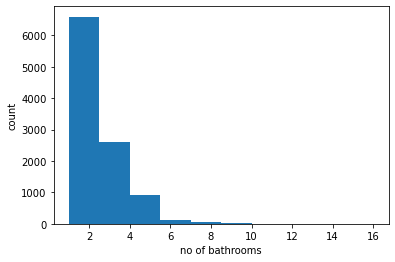

In [83]:
plt.hist(df7.bath)
plt.xlabel("no of bathrooms")
plt.ylabel("count")

In [84]:
df8=df7[df7.bath<=df7.size_in_bhk]

In [85]:
df8.shape

(9707, 7)

In [86]:
df8[df8.balcony>2]

,location,total_sqft,bath,balcony,price,size_in_bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,3520.000000
15,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
20,1st Phase JP Nagar,2825.0,4.0,3.0,250.0,4,8849.557522
30,1st Phase JP Nagar,1590.0,3.0,3.0,131.0,3,8238.993711
35,1st Phase JP Nagar,2077.0,3.0,3.0,175.0,3,8425.613866
...,...,...,...,...,...,...,...
10245,other,1369.0,2.0,3.0,72.0,3,5259.313367
10259,other,2872.0,4.0,3.0,183.0,4,6371.866295
10264,other,1975.0,3.0,3.0,90.0,3,4556.962025
10276,other,1500.0,2.0,3.0,78.0,3,5200.000000


In [87]:
#anamoly 4(no of balcony<=no of bhk)

Text(0, 0.5, 'count of balcony')

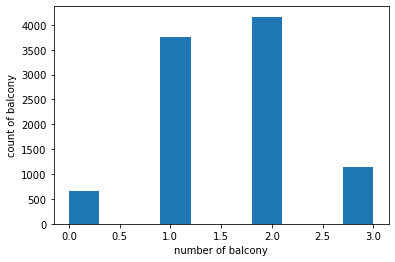

In [88]:
plt.hist(df8.balcony)
plt.xlabel("number of balcony")
plt.ylabel("count of balcony")

In [89]:
df9=df8[df8.balcony<=df8.size_in_bhk]

In [90]:
df9.shape

(9396, 7)

In [91]:
#we have done with data cleaning and outlier removal now our data is set to do prediction

In [92]:
df10=df9.drop(['price_per_sqft'],axis=1)

In [93]:
df10.head()

,location,total_sqft,bath,balcony,price,size_in_bhk
0,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3


In [94]:
df10.shape

(9396, 6)

In [95]:
#since ML algo cant interpret text data so we have to convert(Categorical values "location") it into numeric column
#using pandas dummy variable

In [96]:
dummy=pd.get_dummies(df10.location)
dummy.head(2)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df11=pd.concat([df10,dummy],axis=1)

In [98]:
df11.head(2)

,location,total_sqft,bath,balcony,price,size_in_bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
#we have to drop location now its converted into dummies now it has no use
df12=df11.drop(['location'],axis=1)

In [100]:
df12

,total_sqft,bath,balcony,price,size_in_bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1250.0,2.0,3.0,44.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2.0,40.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10283,1256.0,2.0,1.0,65.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10284,1353.0,2.0,2.0,110.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10285,812.0,1.0,0.0,26.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10286,1440.0,2.0,2.0,63.93,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
x=df12.drop(['price'],axis=1)

In [102]:
y=df12.price

In [103]:
x

,total_sqft,bath,balcony,size_in_bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1250.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10283,1256.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10284,1353.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10285,812.0,1.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10286,1440.0,2.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [104]:
y

0         44.00
1         40.00
2         83.00
3         40.00
4         65.00
          ...  
10283     65.00
10284    110.00
10285     26.00
10286     63.93
10287     48.00
Name: price, Length: 9396, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split


In [106]:
#Linear Regression for our model and checking the max accuracy score for random state i

In [107]:
from sklearn.linear_model import LinearRegression
l=[]
for i in range(1,51):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    reg=LinearRegression()
    reg.fit(x_train,y_train)
    result=reg.score(x_test,y_test)
    print("for {} accuracy score is {}".format(i,result*100))
    l.append(reg.score(x_test,y_test))

    

for 1 accuracy score is 75.3492554349114
for 2 accuracy score is 80.34390444276116
for 3 accuracy score is 72.98563318561693
for 4 accuracy score is 84.52537864809143
for 5 accuracy score is 87.14975713239654
for 6 accuracy score is 77.495322926709
for 7 accuracy score is 80.6630714794576
for 8 accuracy score is 88.09802753737742
for 9 accuracy score is 83.30053214033111
for 10 accuracy score is 79.81140795149557
for 11 accuracy score is 80.57764689278955
for 12 accuracy score is 85.71176618817927
for 13 accuracy score is 84.01010628128547
for 14 accuracy score is 85.66016460916939
for 15 accuracy score is 87.0974269940342
for 16 accuracy score is 77.5865251036811
for 17 accuracy score is 77.32459063774752
for 18 accuracy score is 80.71966462728899
for 19 accuracy score is 80.61957191304721
for 20 accuracy score is 78.24053923554493
for 21 accuracy score is 76.87470128547996
for 22 accuracy score is 78.88244348274101
for 23 accuracy score is 75.09607281589552
for 24 accuracy score is 8

In [108]:
print(max(l)*100)

88.09802753737742


In [109]:
#for random state 8 our algorithm have maximum score

In [110]:
#using descision tree regressor

In [111]:
from sklearn.tree import DecisionTreeRegressor
l_dt=[]
for i in range(1,51):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    reg_dt=DecisionTreeRegressor()
    reg_dt.fit(x_train,y_train)
    result=reg_dt.score(x_test,y_test)
    print("for {} accuracy score is {}".format(i,result*100))
    l_dt.append(reg_dt.score(x_test,y_test))

for 1 accuracy score is 62.75128450215639
for 2 accuracy score is 68.07812581274756
for 3 accuracy score is 61.58305148600225
for 4 accuracy score is 63.04732897834984
for 5 accuracy score is 58.78635187516831
for 6 accuracy score is 69.95033021566606
for 7 accuracy score is 70.74732594528842
for 8 accuracy score is 62.0726634730086
for 9 accuracy score is 66.90715634310558
for 10 accuracy score is 51.52488095308192
for 11 accuracy score is 53.95378828886632
for 12 accuracy score is 66.80129943065869
for 13 accuracy score is 78.9751413682638
for 14 accuracy score is 75.76720418843492
for 15 accuracy score is 67.27607668104191
for 16 accuracy score is 71.5964300439229
for 17 accuracy score is 69.53915207163331
for 18 accuracy score is 72.9387268459077
for 19 accuracy score is 73.58153595545137
for 20 accuracy score is 64.50695095415577
for 21 accuracy score is 71.96204322286214
for 22 accuracy score is 47.46063104361594
for 23 accuracy score is 28.11924294003155
for 24 accuracy score is

In [112]:
print(max(l_dt)*100)

78.9751413682638


In [113]:
#importing 3rd linear regressor i.e. lesso regressor

In [114]:
from sklearn.linear_model import Lasso
l_l=[]
for i in range(1,51):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    reg_l=Lasso()
    reg_l.fit(x_train,y_train)
    result=reg_l.score(x_test,y_test)
    print("for {} accuracy score is {}".format(i,result*100))
    l_l.append(reg_l.score(x_test,y_test))

for 1 accuracy score is 62.95534732871707
for 2 accuracy score is 60.43473179615199
for 3 accuracy score is 56.99193342486586
for 4 accuracy score is 75.59825766334711
for 5 accuracy score is 76.84642166655429
for 6 accuracy score is 58.507432010280716
for 7 accuracy score is 62.8554666059456
for 8 accuracy score is 77.86284621647613
for 9 accuracy score is 71.52986205865746
for 10 accuracy score is 68.20243962132922
for 11 accuracy score is 65.13004904298612
for 12 accuracy score is 75.17552126334861
for 13 accuracy score is 69.44170008129606
for 14 accuracy score is 70.99171567998317
for 15 accuracy score is 74.10851080512516
for 16 accuracy score is 64.34019768083748
for 17 accuracy score is 69.29712252732398
for 18 accuracy score is 60.32032925003892
for 19 accuracy score is 60.239576139275975
for 20 accuracy score is 59.436477231748185
for 21 accuracy score is 64.02290503572891
for 22 accuracy score is 65.76559508803474
for 23 accuracy score is 59.87869501223528
for 24 accuracy sc

In [115]:
print(max(l_l)*100)

77.86284621647613


In [116]:
#lasso regression accuracy score:77.86%
#Decision Tree regression accuracy score:79.5%
#Linear regression accuracy score:88.09%

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=8)

In [118]:
def predict_price(location,total_sqft,bath,balcony,size_in_bhk):
    loc_index=np.where(x.columns==location)[0][0]
    
    X=np.zeros(len(x.columns))
    X[0]=total_sqft
    X[1]=bath
    X[2]=balcony
    X[3]=size_in_bhk
    if loc_index>=0:
        X[loc_index]=1
    return reg.predict([X])[0]

In [119]:
predict_price('other',1630,3,2,3)

102.24275822788941

In [120]:
df11.head(60)

,location,total_sqft,bath,balcony,price,size_in_bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Devarachikkanahalli,1250.0,2.0,3.0,44.00,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,2.0,43.00,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Devarachikkanahalli,1130.0,2.0,2.0,36.00,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Devarachikkanahalli,1417.0,2.0,2.0,76.00,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Devarachikkanahalli,1230.0,2.0,1.0,58.00,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Devarachikkanahalli,1705.0,3.0,2.0,75.00,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
predict_price('other',1200,2,1,2)

72.27725376266187

In [122]:
predict_price('1st Phase JP Nagar',1000,3,1,3)

89.96000670980108

In [123]:
predict_price('Yelahanka New Town',2000,3,3,3)

113.03752615785194

In [124]:
df9.location.unique()

array([' Devarachikkanahalli', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar',
       'Balagere', 'Banashankari', 'Banashankari Stage II',
       'Banashankari Stage III', 'Banashankari Stage V',
       'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout',
       'Bannerghatta', 'Bannerghatta Road', 'Basavangudi',
       'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road',
       'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli',
       'Billekahalli', 'Binny Pete', 'Bisuva

In [125]:
import pickle
with open("banglore_home_price_model.pickle","wb") as f:
    pickle.dump(reg,f)

In [126]:
import json
columns={
    "data_columns":[col.lower() for col in x.columns]
}
with open ("columns.json","w") as f:
    f.write(json.dumps(columns))

In [128]:
df12

,total_sqft,bath,balcony,price,size_in_bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1250.0,2.0,3.0,44.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2.0,40.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10283,1256.0,2.0,1.0,65.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10284,1353.0,2.0,2.0,110.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10285,812.0,1.0,0.0,26.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10286,1440.0,2.0,2.0,63.93,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
